# First Model Draft

In [1]:
# Import packages
from matplotlib import pyplot as plt
from importlib import reload
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import random
import scipy
import math

# Import model classes
from substation import Substation

## Model Settings

In [2]:
load_dict = {'HouseNew': 10,
             'HouseOld' : 10, 
             'HouseDH': 10, 
             'ApartmentNewDH': 10
            }


# Flex

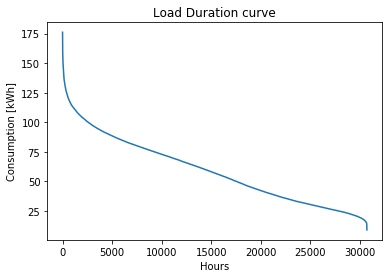

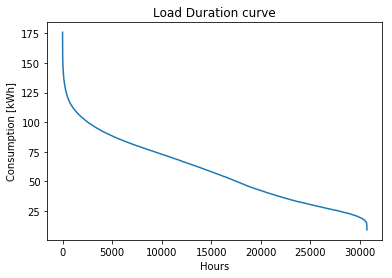

The maximal instant consumption of the substation with 40 loads is 176.1045 without demand side flexibility and 175.99949999999998 with 15 flexible loads.


In [3]:
def test_flex(days = 17, percent_loads = 0.5, reduction = 0.30):
    # create empty station
    station = Substation('Stockholm')
    
    #add loads
    for load,num in load_dict.items():
        station.add_residential_load(load,num)

    #find instant max 
    station.update_aggregated_col()
    max_consumption = station.dataframe['AggregatedLoad'].max()
    
    #load duration curve before
    station.print_insights(duration_curve = True,
                           month_plot = False, 
                           weekday_plot = False, 
                           hour_plot = False)
    
    #infer flexible loads
    station.introduce_flexibility(days, percent_loads, reduction)
    
    #find instant max with flex
    station.update_aggregated_col()
    max_flex_consumption = station.dataframe['AggregatedLoad'].max()
    
    #load duration curve after
    station.print_insights(duration_curve = True,
                           month_plot = False, 
                           weekday_plot = False, 
                           hour_plot = False)
    
    print('The maximal instant consumption of the substation with {} loads is {} without demand side flexibility and {} with {} flexible loads.'.format(station.load_count,max_consumption,max_flex_consumption,station.flex_count))
    
test_flex()

In [12]:
station = Substation('Stockholm')
    
#add loads
for load,num in load_dict.items():
    station.add_residential_load(load,num)
    
station.dataframe.loc[:,range(1,station.load_count)].apply(lambda x: x *(1-0.3), axis = 0)

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-31 00:00:00,1.2159,0.9457,0.8792,2.4899,1.9600,0.4522,0.9933,1.5232,1.0164,0.7504,...,0.0000,0.0490,0.0000,0.0532,0.0000,0.0553,0.0483,0.1134,0.0000,0.7721
2015-10-31 01:00:00,1.4126,0.7791,0.8806,2.1861,3.6995,0.5929,1.0080,0.7609,0.7399,1.1837,...,0.0000,0.1211,0.0000,0.0532,0.0000,0.0441,0.0455,0.0560,0.0000,0.2961
2015-10-31 02:00:00,0.6895,0.8547,0.8771,1.9082,3.4657,0.4571,1.2313,1.3090,1.0857,1.0080,...,0.0000,0.0420,0.0000,0.0532,0.0000,0.0434,0.0420,0.0301,0.0000,0.4102
2015-10-31 03:00:00,1.1193,0.8197,0.8757,1.9131,1.8928,0.5131,0.9793,1.2782,1.3895,0.7826,...,0.0000,0.0322,0.0000,0.0532,0.0000,0.0427,0.0420,0.0336,0.0000,0.1869
2015-10-31 04:00:00,1.3860,0.7805,0.8757,1.8431,4.6263,0.5446,1.0311,0.8799,1.0535,0.7294,...,0.0000,0.0336,0.0000,0.0532,0.0000,0.0406,0.0462,0.0210,0.0000,0.0980
2015-10-31 05:00:00,0.9198,0.8344,0.8708,1.7584,4.6599,0.4711,1.2502,1.2817,1.1214,0.7441,...,0.0000,0.0315,0.0000,0.0532,0.0000,0.0371,0.0385,0.0343,0.0000,0.0868
2015-10-31 06:00:00,1.2019,0.7959,0.8701,1.7367,3.5210,0.5019,0.9758,0.7938,1.3580,1.1228,...,0.0000,0.0308,0.0000,0.0532,0.0000,0.0420,0.0588,0.0294,0.0000,0.0476
2015-10-31 07:00:00,0.9779,1.8053,0.8589,1.7080,4.4632,0.5467,1.0689,1.3881,1.6541,1.5701,...,0.0000,0.0308,0.0000,0.0532,0.0000,0.0427,0.0427,0.0217,0.0000,0.0441
2015-10-31 08:00:00,1.4812,1.1732,0.8568,1.7948,2.5452,0.5628,1.1907,1.3517,1.2467,1.5988,...,0.0000,0.0308,0.0000,0.0532,0.0000,0.0392,0.0525,0.0329,0.0000,0.0434


In [13]:
station.dataframe.loc[:,range(1,station.load_count)]

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-31 00:00:00,1.737,1.351,1.256,3.557,2.800,0.646,1.419,2.176,1.452,1.072,...,0.000,0.070,0.000,0.076,0.000,0.079,0.069,0.162,0.000,1.103
2015-10-31 01:00:00,2.018,1.113,1.258,3.123,5.285,0.847,1.440,1.087,1.057,1.691,...,0.000,0.173,0.000,0.076,0.000,0.063,0.065,0.080,0.000,0.423
2015-10-31 02:00:00,0.985,1.221,1.253,2.726,4.951,0.653,1.759,1.870,1.551,1.440,...,0.000,0.060,0.000,0.076,0.000,0.062,0.060,0.043,0.000,0.586
2015-10-31 03:00:00,1.599,1.171,1.251,2.733,2.704,0.733,1.399,1.826,1.985,1.118,...,0.000,0.046,0.000,0.076,0.000,0.061,0.060,0.048,0.000,0.267
2015-10-31 04:00:00,1.980,1.115,1.251,2.633,6.609,0.778,1.473,1.257,1.505,1.042,...,0.000,0.048,0.000,0.076,0.000,0.058,0.066,0.030,0.000,0.140
2015-10-31 05:00:00,1.314,1.192,1.244,2.512,6.657,0.673,1.786,1.831,1.602,1.063,...,0.000,0.045,0.000,0.076,0.000,0.053,0.055,0.049,0.000,0.124
2015-10-31 06:00:00,1.717,1.137,1.243,2.481,5.030,0.717,1.394,1.134,1.940,1.604,...,0.000,0.044,0.000,0.076,0.000,0.060,0.084,0.042,0.000,0.068
2015-10-31 07:00:00,1.397,2.579,1.227,2.440,6.376,0.781,1.527,1.983,2.363,2.243,...,0.000,0.044,0.000,0.076,0.000,0.061,0.061,0.031,0.000,0.063
2015-10-31 08:00:00,2.116,1.676,1.224,2.564,3.636,0.804,1.701,1.931,1.781,2.284,...,0.000,0.044,0.000,0.076,0.000,0.056,0.075,0.047,0.000,0.062
